In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
trip_df = pd.read_csv('../data/trip.csv')

##### Step 1

### check the information

In [284]:
trip_df.shape

(22701, 9)

In [285]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [286]:
trip_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


- 필요없는 컬럼 drop (name, tip_amount, tolls) panssener_count은 애매하니 일단 보류

In [287]:
trip_df = trip_df.drop(['passenger_name','tip_amount','tolls_amount'],axis=1)

### find NULL & drop

In [288]:
trip_df[trip_df.isnull().any(axis=1)]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount
52,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN
189,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN
244,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN


In [289]:
trip_df = trip_df.dropna()

In [290]:
trip_df[trip_df.isnull().any(axis=1)]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount


### find distance <= 0 & fare_amout <= 0 & drop

In [291]:
trip_df[(trip_df['trip_distance']<=0) | (trip_df['fare_amount']<=0)].count()

tpep_pickup_datetime     164
tpep_dropoff_datetime    164
payment_method           164
passenger_count          164
trip_distance            164
fare_amount              164
dtype: int64

In [292]:
trip_df = trip_df[(trip_df['trip_distance']>0) & (trip_df['fare_amount']>0)]

In [293]:
trip_df[(trip_df['trip_distance']<=0) | (trip_df['fare_amount']<=0)].count()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
dtype: int64

In [294]:
trip_df.describe()

,passenger_count,trip_distance,fare_amount
count,22534.000000,22534.000000,22534.000000
mean,1.645070,2.932131,12.974022
std,1.306343,3.654376,12.662178
min,0.000000,0.010000,0.010000
25%,1.000000,1.000000,6.500000
50%,1.000000,1.630000,9.500000
75%,2.000000,3.090000,14.500000
max,36.000000,33.960000,999.990000


### find [distance & fare_amount] outlier

- check distance's outlier
- check fare amount's outlier
- compare fare_amount and trip_distance

In [295]:
# quantile()
q1 = trip_df['trip_distance'].quantile(0.25)
q3 = trip_df['trip_distance'].quantile(0.75)
iqr = q3-q1

In [296]:
trip_df['trip_distance']>q3+1.5*iqr

0        False
1        False
2        False
3        False
4        False
         ...  
22696    False
22697     True
22698    False
22699    False
22700    False
Name: trip_distance, Length: 22534, dtype: bool

In [297]:
out_v = trip_df[trip_df['trip_distance']>q3+1.5*iqr].index

In [298]:
trip_df.drop(out_v, inplace=True)

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

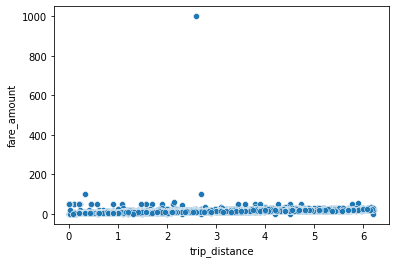

In [299]:
sns.scatterplot(x=trip_df['trip_distance'], y=trip_df['fare_amount'])

In [300]:
Q1 = trip_df['fare_amount'].quantile(0.25)
Q3 = trip_df['fare_amount'].quantile(0.75)
Iqr = q3-q1

In [301]:
trip_df['fare_amount']> Q3+1.5*Iqr

0        False
1         True
2        False
3         True
4         True
         ...  
22695    False
22696    False
22698    False
22699    False
22700    False
Name: fare_amount, Length: 20047, dtype: bool

In [302]:
out_v_a = trip_df[trip_df['fare_amount']> Q3+1.5*Iqr].index

In [303]:
trip_df.drop(out_v_a, inplace=True)

In [304]:
trip_df.describe()

,passenger_count,trip_distance,fare_amount
count,17552.000000,17552.000000,17552.000000
mean,1.637192,1.514843,8.498263
std,1.284978,0.861065,3.104233
min,0.000000,0.010000,0.010000
25%,1.000000,0.880000,6.000000
50%,1.000000,1.310000,8.000000
75%,2.000000,2.000000,10.500000
max,6.000000,6.200000,15.500000


<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

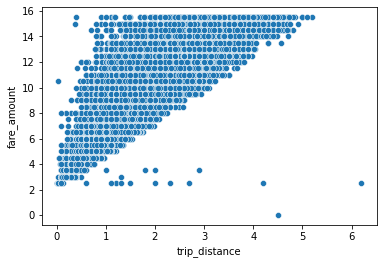

In [305]:
sns.scatterplot(x=trip_df['trip_distance'], y=trip_df['fare_amount'])

- scatterplot을 봤을때 trip_distance가 높을때 fare_amount가 낮은 값들 drop

In [306]:
trip_df[['trip_distance','fare_amount']].sort_values(by='trip_distance', ascending=False).index[0]

19030

In [307]:
trip_df.drop(19030, inplace=True)

In [308]:
trip_df[['trip_distance','fare_amount']].sort_values(by='trip_distance', ascending=False)

,trip_distance,fare_amount
3817,5.20,15.5
15790,5.10,15.5
11374,5.00,15.5
1485,5.00,15.5
10074,4.90,15.0
...,...,...
14470,0.02,2.5
325,0.02,2.5
9190,0.01,2.5
5503,0.01,2.5


In [309]:
trip_df[(trip_df['fare_amount']<4) & (trip_df['trip_distance']>1)].count()

tpep_pickup_datetime     13
tpep_dropoff_datetime    13
payment_method           13
passenger_count          13
trip_distance            13
fare_amount              13
dtype: int64

- 13개 뿐이고 거슬리는 값들이기에 그냥 삭제

In [310]:
trip_df = trip_df[(trip_df['fare_amount']>=4) | (trip_df['trip_distance']<=1)]

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

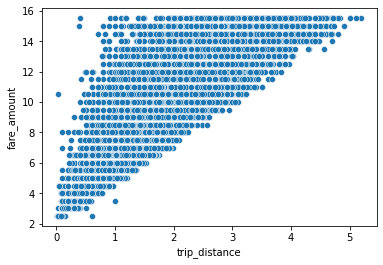

In [311]:
sns.scatterplot(x=trip_df['trip_distance'], y=trip_df['fare_amount'])

##### Step 2

- 시간, 거리, 요금 상관관계

In [312]:
trip_df = trip_df.reset_index(drop=True)

In [313]:
trip_df.rename({'tpep_pickup_datetime': 'pickup_time', 'tpep_dropoff_datetime': 'drop_time'},axis=1,inplace=True)

In [314]:
trip_df['pickup_time'] = pd.to_datetime(trip_df['pickup_time'])

In [315]:
trip_df['drop_time'] = pd.to_datetime(trip_df['drop_time'])

In [316]:
from datetime import datetime, timedelta

In [317]:
trip_df['time_diff'] = trip_df['drop_time']-trip_df['pickup_time']

In [318]:
trip_df['time_diff'] = trip_df['time_diff'].astype('str').str.split().str[-1]

In [319]:
trip_df['time_diff']=pd.to_timedelta(trip_df['time_diff'])

In [320]:
# .dt.total_seconds()는 시간 간격을 초 단위로 변환해주는 함수

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

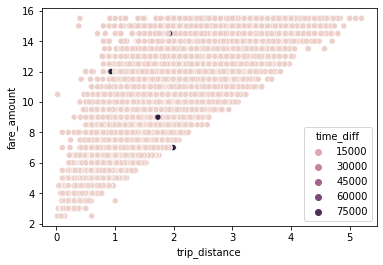

In [321]:
sns.scatterplot(x=trip_df['trip_distance'], y=trip_df['fare_amount'], hue=trip_df['time_diff'].dt.total_seconds())

- card 통합

In [322]:
trip_df

,pickup_time,drop_time,payment_method,passenger_count,trip_distance,fare_amount,time_diff
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,0 days 00:14:04
1,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,0 days 00:07:12
2,2017-03-25 20:34:11,2017-03-25 20:42:11,Debit Card,6,2.30,9.0,0 days 00:08:00
3,2017-02-04 16:17:07,2017-02-04 16:29:14,Cash,1,1.20,9.0,0 days 00:12:07
4,2017-11-10 15:20:29,2017-11-10 15:40:55,Cash,1,1.60,13.0,0 days 00:20:26
...,...,...,...,...,...,...,...
17533,2017-08-10 22:20:04,2017-08-10 22:29:31,Cash,1,0.89,7.5,0 days 00:09:27
17534,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0 days 00:03:16
17535,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0 days 00:04:08
17536,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,0 days 00:11:56


In [323]:
trip_df.rename({'payment_method':'payment'},axis=1,inplace=True)

In [324]:
trip_df['payment'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [325]:
trip_df['payment'].str.split().str[-1]

0        Card
1        Card
2        Card
3        Cash
4        Cash
         ... 
17533    Cash
17534    Cash
17535    Card
17536    Card
17537    Cash
Name: payment, Length: 17538, dtype: object

In [326]:
trip_df['payment'] = trip_df['payment'].str.split().str[-1]

In [327]:
trip_df

,pickup_time,drop_time,payment,passenger_count,trip_distance,fare_amount,time_diff
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,0 days 00:14:04
1,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,0 days 00:07:12
2,2017-03-25 20:34:11,2017-03-25 20:42:11,Card,6,2.30,9.0,0 days 00:08:00
3,2017-02-04 16:17:07,2017-02-04 16:29:14,Cash,1,1.20,9.0,0 days 00:12:07
4,2017-11-10 15:20:29,2017-11-10 15:40:55,Cash,1,1.60,13.0,0 days 00:20:26
...,...,...,...,...,...,...,...
17533,2017-08-10 22:20:04,2017-08-10 22:29:31,Cash,1,0.89,7.5,0 days 00:09:27
17534,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0 days 00:03:16
17535,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0 days 00:04:08
17536,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,0 days 00:11:56
